# Common Distributions
The ones that are most used by Bayesian practitioners

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import scipy
from scipy import stats

You are running the v4 development version of PyMC which currently still lacks key features. You probably want to use the stable v3 instead which you can either install via conda or find on the v3 GitHub branch: https://github.com/pymc-devs/pymc/tree/v3


In [3]:
az.style.use("arviz-darkgrid")

# There are many distributions
* We'll cover the most typically used ones here
  * Just these few cover the vast majority of Bayesian work
  * Any of the more specialized ones are easy to learn if you end up needing them

In [4]:
def plot_format(x_label="x"):
    plt.xlabel(x_label, fontsize=12)
    #plt.ylabel('f(x)', fontsize=12)
    plt.yticks([])
    plt.ylim(0)
    plt.legend()
    return

# Discrete Distributions
Great for

* Counts
* Binary Outcomes (which are just counts)
* Categories (which are also just counts)

# Bernoulli
* Binary outcomes as we've seen in AB Testing and in this lesson
* Plotted here with lines so we can see more than one

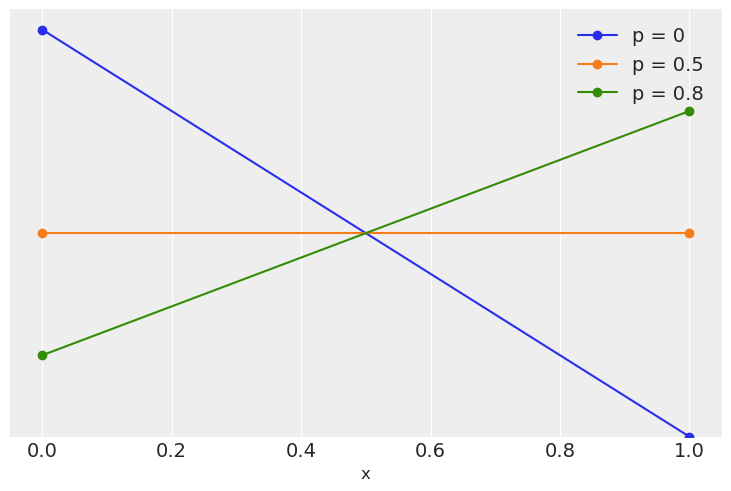

In [5]:
x = [0, 1]
for p in [0, 0.5, 0.8]:
    pmf = stats.bernoulli.pmf(x, p)
    plt.plot(x, pmf, '-o', label='p = {}'.format(p))
plot_format();

# Bernoulli Example

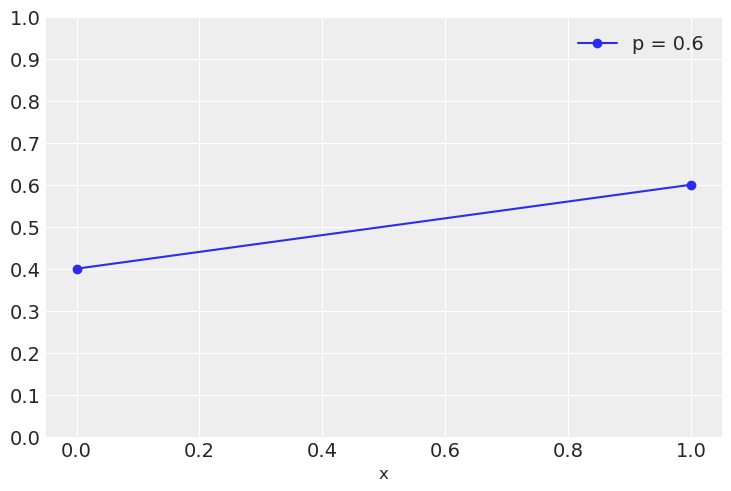

In [6]:
x = [0, 1]
p=.6
pmf = stats.bernoulli.pmf(x, .6)
plt.plot(x, pmf, '-o', label='p = {}'.format(p));
plot_format()
plt.yticks(np.arange(0, 1.1,.1));

# Binomial
* Count of "success" in a fixed number
* Proportion in a group

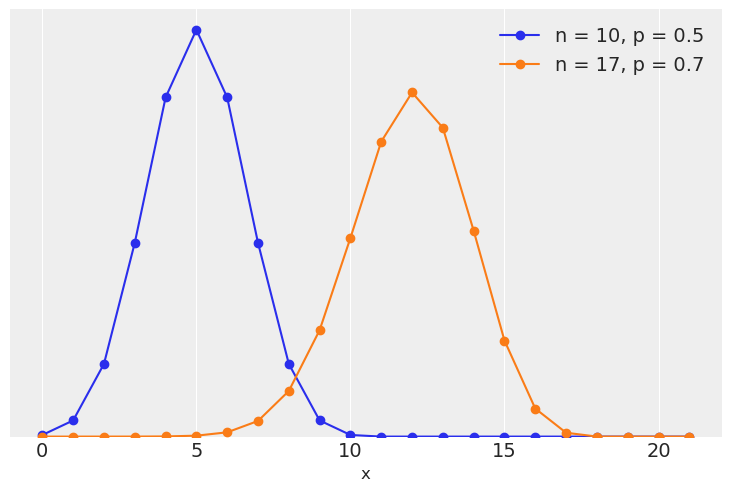

In [7]:
x = np.arange(0, 22)
ns = [10, 17]
ps = [0.5, 0.7]
for n, p in zip(ns, ps):
    pmf = stats.binom.pmf(x, n, p)
    plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plot_format()

# Binomial Example

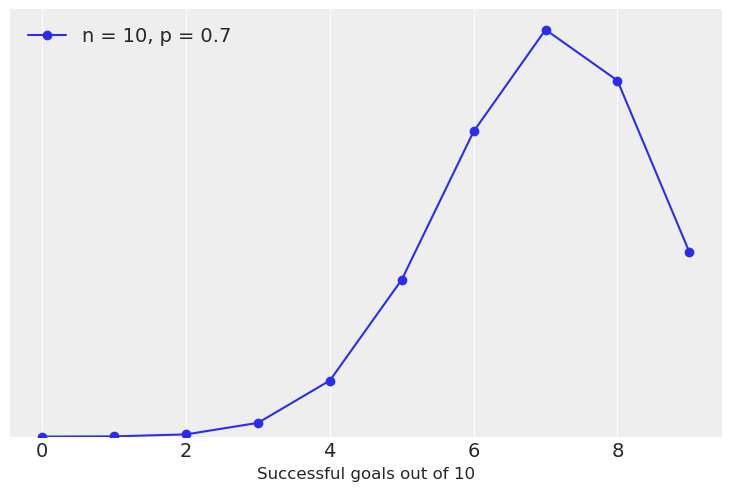

In [8]:
x = np.arange(0, 10)
n = 10
p = 0.7

pmf = stats.binom.pmf(x, n, p)
plt.plot(x, pmf, '-o', label='n = {}, p = {}'.format(n, p))
plot_format("Successful goals out of 10");

# Categorical
* Counts from categories
 * "There are red, green, and blue, balls in a jar, whats the probability of picking each one?"

<module 'matplotlib.pyplot' from '/home/canyon/miniconda3/envs/bayes_course/lib/python3.9/site-packages/matplotlib/pyplot.py'>

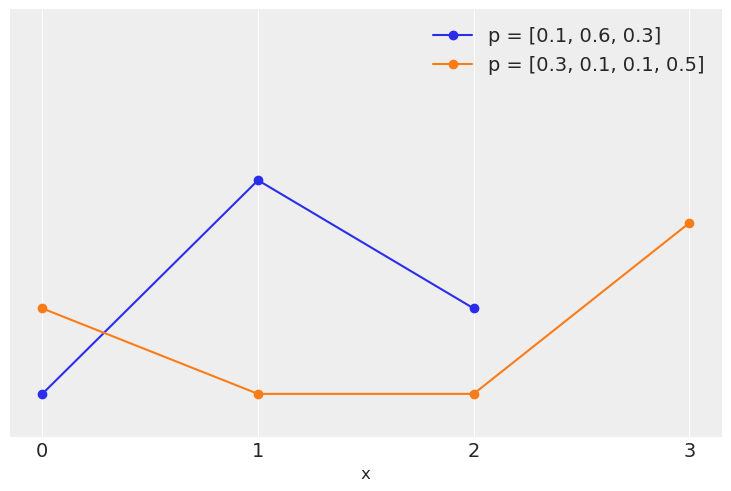

In [8]:
ps = [[0.1, 0.6, 0.3], [0.3, 0.1, 0.1, 0.5]]
for p in ps:
    x = range(len(p))
    plt.plot(x, p, '-o', label='p = {}'.format(p))
plt.xticks(np.arange(4))
plt.ylim([0,1])
plot_format();


# Categorical Example

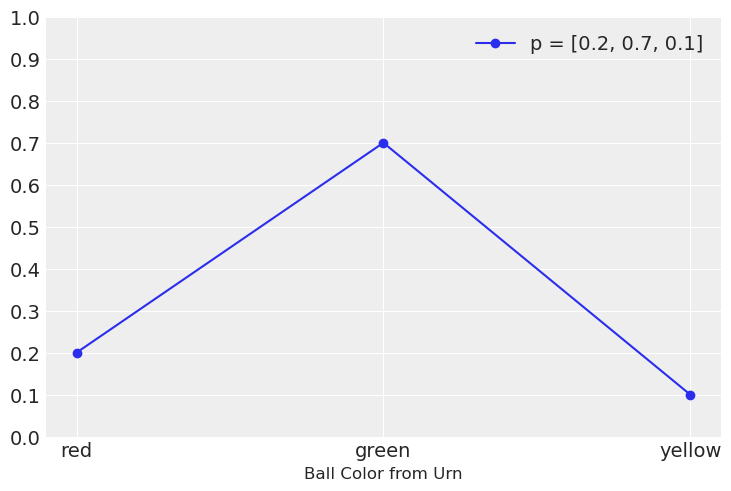

In [9]:
p = [0.2, 0.7, 0.1]
x = range(len(p))
plt.plot(x, p, '-o', label='p = {}'.format(p))
plt.xticks(x, ["red", "green", "yellow"])
plt.ylim([0,1])
plot_format("Ball Color from Urn")
plt.yticks(np.arange(0, 1.1,.1));


# Poisson
* Count of events in a fixed period of time

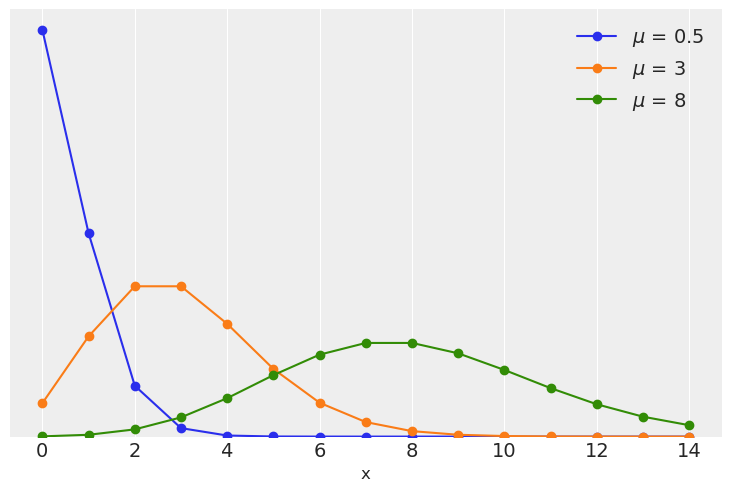

In [17]:
x = np.arange(0, 15)
for m in [.5, 3, 8]:
    pmf = stats.poisson.pmf(x, m)
    plt.plot(x, pmf, '-o', label='$\mu$ = {}'.format(m))
plt.ylim(0)
plt.legend(loc=1)
plot_format();


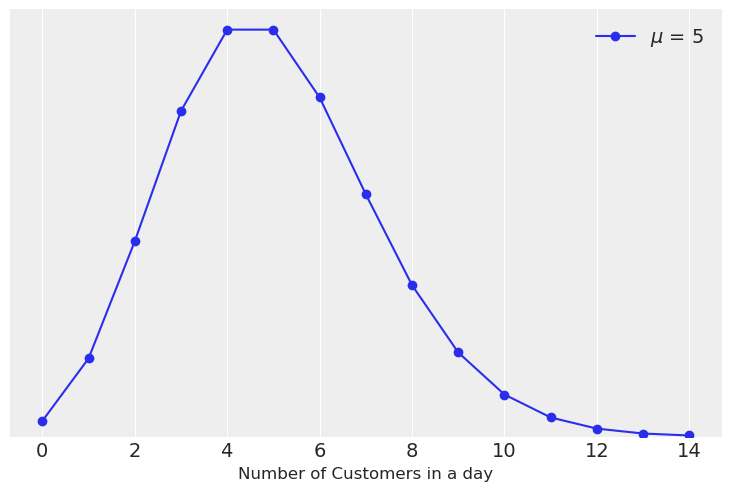

In [21]:
x = np.arange(0, 15)
m = 5
pmf = stats.poisson.pmf(x, m)
plt.plot(x, pmf, '-o', label='$\mu$ = {}'.format(m))
plot_format("Number of Customers in a day");


# Negative Binomial
* Number of failures until N number of successes
* Number of events occurring
* Like Binomial but without upper limit

<module 'matplotlib.pyplot' from '/home/canyon/miniconda3/envs/bayes_course/lib/python3.9/site-packages/matplotlib/pyplot.py'>

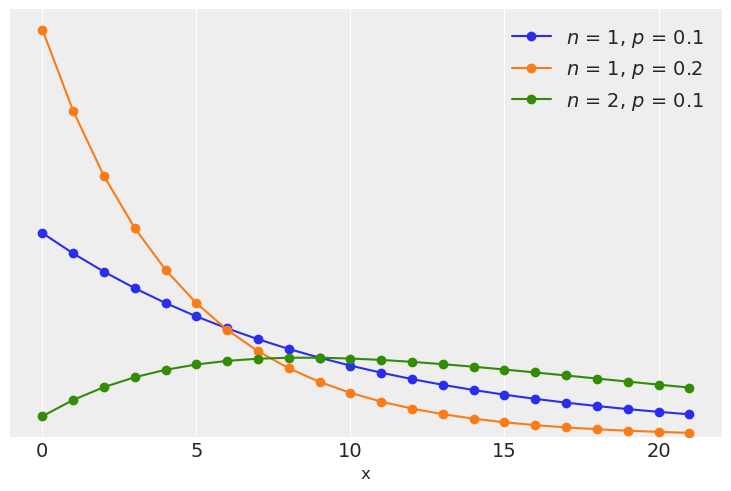

In [10]:
k = np.arange(0, 22)
ns = [1 ,1,2]
ps = [.1, .2 , .1]
for n, p in zip(ns, ps):
    pmf = stats.nbinom(n, p).pmf(k)
    plt.plot(k, pmf, '-o', label=r'$n$ = {}, $p$ = {}'.format(n, p))
plot_format();

# Negative Binomial Example

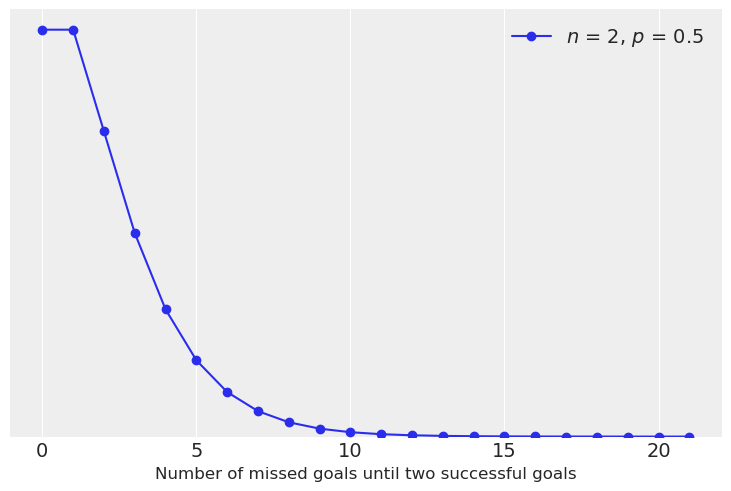

In [11]:
k = np.arange(0, 22)
n = 2
p = .5

pmf = stats.nbinom(n, p).pmf(k)
plt.plot(k, pmf, '-o', label=r'$n$ = {}, $p$ = {}'.format(n, p))
plot_format("Number of missed goals until two successful goals");

# Continuous Distributions

# Beta
Great for things that are bounded for instance
* 0 to 1 like probabilities 
* 0% to 100% bounded percentage

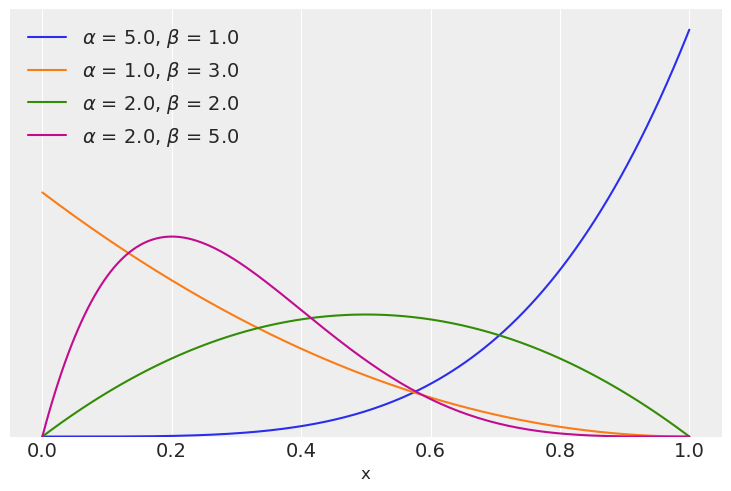

In [10]:
x = np.linspace(0, 1, 200)
alphas = [5., 1., 2., 2.]
betas = [1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plot_format()


# Beta Example

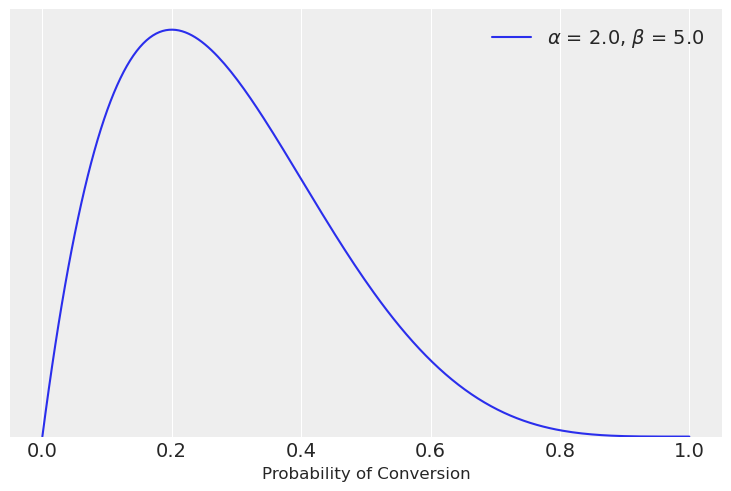

In [13]:
x = np.linspace(0, 1, 200)
alpa = 1
betas = 2
pdf = stats.beta.pdf(x, a, b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plot_format("Probability of Conversion");


# Normal
* Symmetry around mean is very common in nature
* Very popular due to Central Limit Theorem and Frequentist statistics
* Still great in Bayesian context though the point above is not as necessary for us

<module 'matplotlib.pyplot' from '/home/canyon/miniconda3/envs/bayes_course/lib/python3.9/site-packages/matplotlib/pyplot.py'>

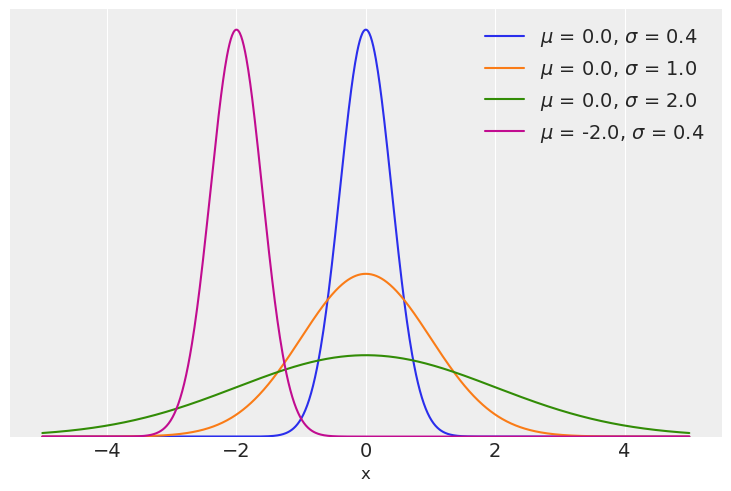

In [14]:
x = np.linspace(-5, 5, 1000)
mus = [0., 0., 0., -2.]
sigmas = [0.4, 1., 2., 0.4]
for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plot_format();


# Normal Example

<module 'matplotlib.pyplot' from '/home/canyon/miniconda3/envs/bayes_course/lib/python3.9/site-packages/matplotlib/pyplot.py'>

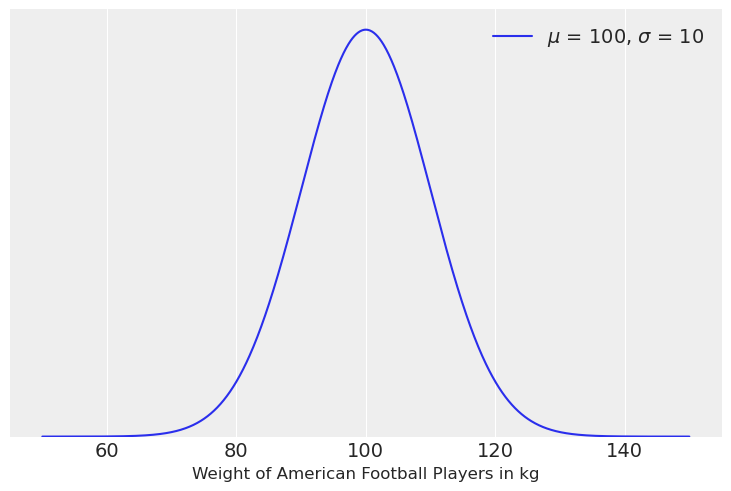

In [15]:
x = np.linspace(50, 150, 1000)
mu= 100
sigma = 10
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plot_format("Weight of American Football Players in kg");


# Student T
* Like the Normal distribution but with heavier tails
  * This is great for handling outliers

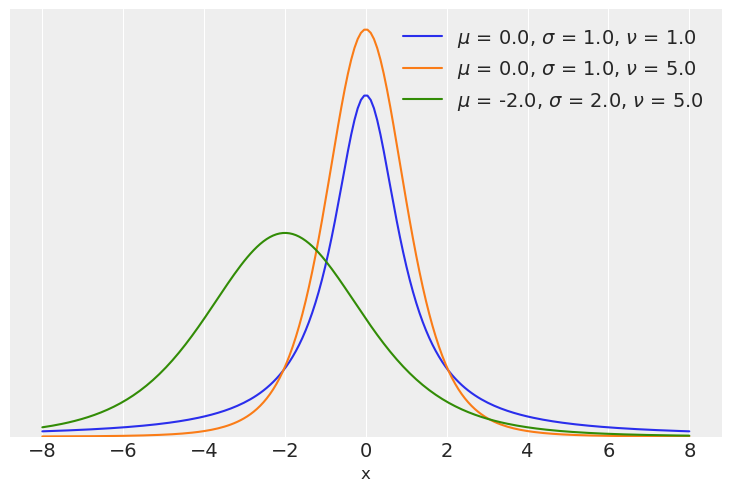

In [9]:
x = np.linspace(-8, 8, 200)
mus = [0., 0., -2.]
sigmas = [1., 1., 2.]
dfs = [1., 5., 5.]
for mu, sigma, df in zip(mus, sigmas, dfs):
    pdf = stats.t.pdf(x, df, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plot_format();


# Student T Example

<module 'matplotlib.pyplot' from '/home/canyon/miniconda3/envs/bayes_course/lib/python3.9/site-packages/matplotlib/pyplot.py'>

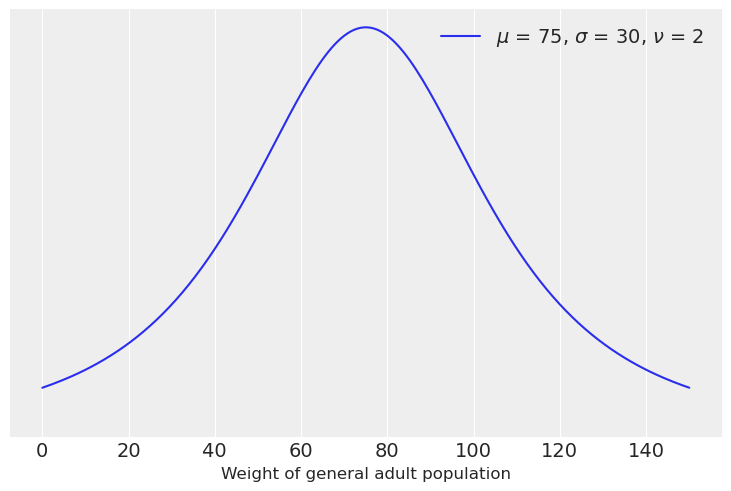

In [17]:
x = np.linspace(0, 150, 200)
mu = 75
sigma = 30
df = 2
pdf = stats.t.pdf(x, df, loc=mu, scale=sigma)
plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}, $\nu$ = {}'.format(mu, sigma, df))
plot_format("Weight of general adult population");

# Half Versions of Normal, Student T
* Same idea but for things that can only be positive
  * Examples including estimating parameters that can be positive like variance or standard deviation

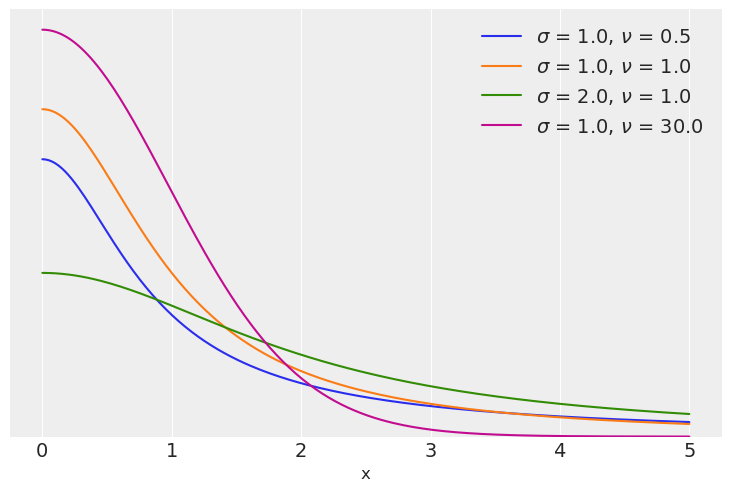

In [18]:
x = np.linspace(0, 5, 200)
sigmas = [1., 1., 2., 1.]
nus = [.5, 1., 1., 30.]
for sigma, nu in zip(sigmas, nus):
    pdf = stats.t.pdf(x, df=nu, loc=0, scale=sigma)
    plt.plot(x, pdf, label=r'$\sigma$ = {}, $\nu$ = {}'.format(sigma, nu))
plot_format();

# Half Student T Example

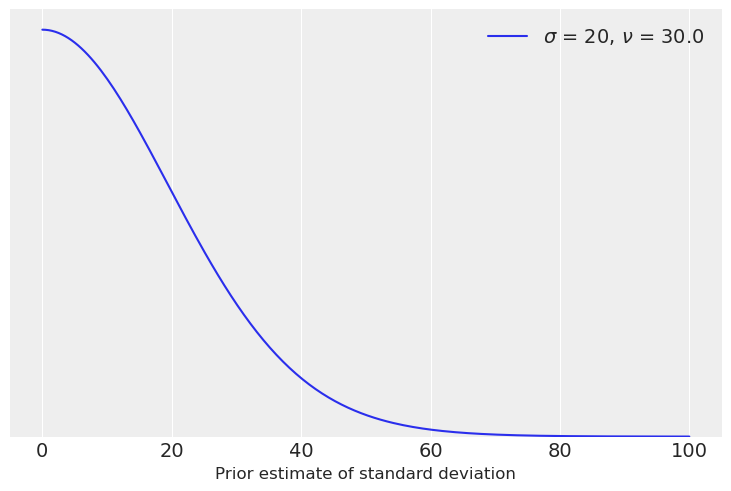

In [19]:
x = np.linspace(0, 100, 200)
sigma = 20
nus = 5
pdf = stats.t.pdf(x, df=nu, loc=0, scale=sigma)
plt.plot(x, pdf, label=r'$\sigma$ = {}, $\nu$ = {}'.format(sigma, nu))
plot_format("Prior estimate of standard deviation");

# Gamma


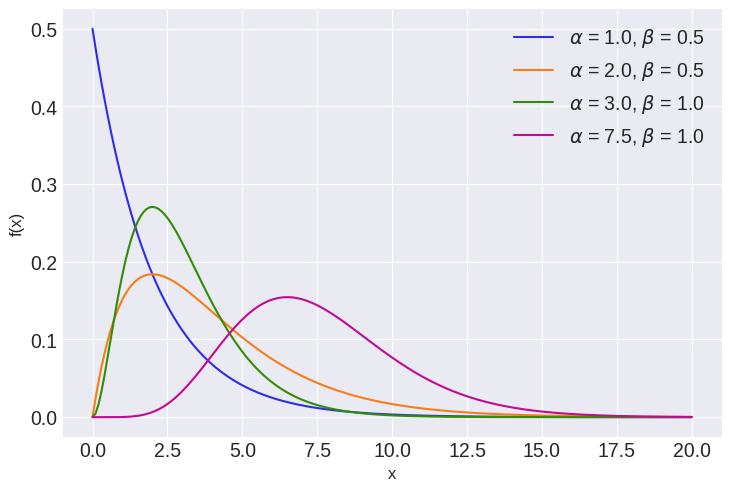

In [24]:
x = np.linspace(0, 20, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]
for a, b in zip(alphas, betas):
    pdf = stats.gamma.pdf(x, a, scale=1.0/b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show();

# Combining Distributions
A very powerful idea is combining distributions together

# Beta Binomial (The AB Test model)
1. Beta distributions model proportions quite well
2. Binomial distributions 

(0.0, 200.0)

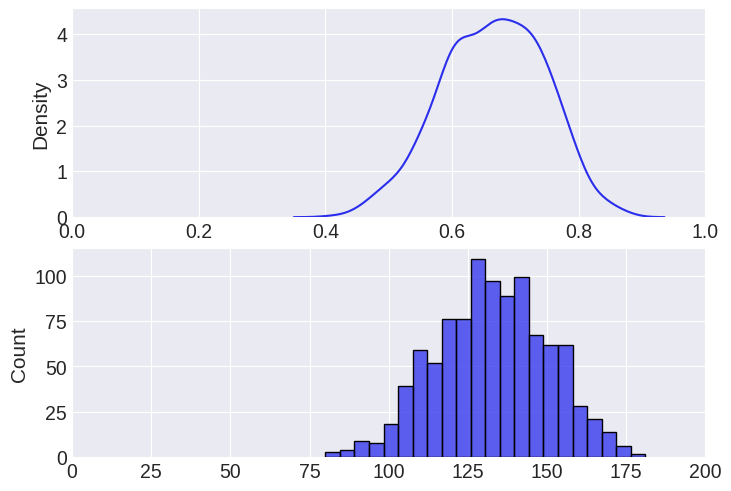

In [48]:
fig, axes = plt.subplots(2,1)
n_samples = 1000
visitors = 200
beta_samples = stats.beta(20,10).rvs(n_samples)
binomial_samples = stats.binom(p=beta_samples, n=visitors).rvs(n_samples)


sns.kdeplot(beta_samples, ax=axes[0])
axes[0].set_xlim((0,1))
sns.histplot(binomial_samples, ax=axes[1])
axes[1].set_xlim((0,200));

# Gamma Poisson (Also known as Negative Binomial)
* Gamma captures the plausible beliefs of arrival rates and Poisson models the actual arrivals
* This version of Negative Binomial is parameterized by two parameters 

WIP while I wait for Alex to help me fill this in

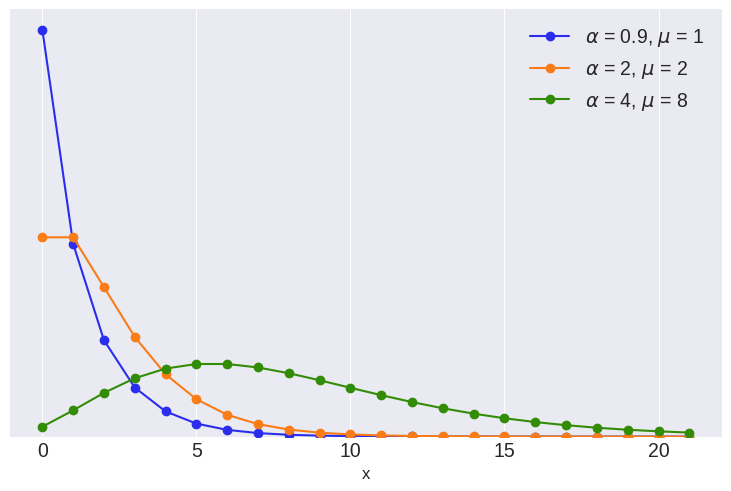

In [53]:
def NegBinom(a, m, x):
    pmf = special.binom(x + a - 1, x) * (a / (m + a))**a * (m / (m + a))**x
    return pmf

x = np.arange(0, 22)
alphas = [0.9, 2, 4]
mus = [1, 2, 8]
for a, m in zip(alphas, mus):
    pmf = NegBinom(a, m, x)
    plt.plot(x, pmf, '-o', label=r'$\alpha$ = {}, $\mu$ = {}'.format(a, m))
plt.legend(loc=1)
plot_format();

# Section Recap
* The distributions covered here will be nearly all you need
* There are many more distributions but it's easy enough to learn them as you go
* Distributions can, and frequently are, combined to generalize to rea